In [2]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler


In [3]:
dataset = np.load("dataset.npz")
X, y = dataset["X"], dataset["y"]

In [4]:
random_state = 42
X_scaled = X / 255.0 

Label for image 10: 3


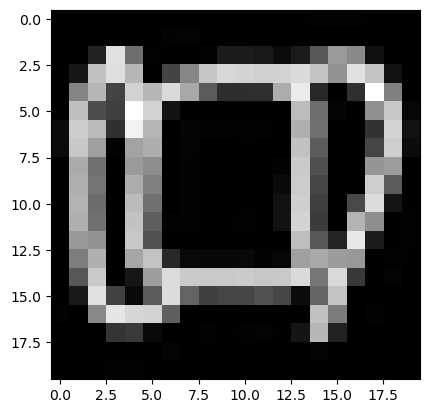

In [5]:
#vislualize

#chosen image
k=10

shape = (X[k].reshape(20,20))
flatten = shape.flatten()

print(f"Label for image {k}: {y[k]}")
plt.imshow(shape, vmin=0, vmax=255, cmap="gray")
plt.show()

# KNN

In [10]:
# K-Nearest Neighbors (KNN) Classifier
# Implementer k fold, brukt i oblig 1 hvis ikke sklearn har den
# Bruk scoring f1 istedet for accuracy på grid search

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random_state)

param_grid_knn = {
    'n_neighbors': [2, 3, 4, 5, 6, 7],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
}

knn = KNeighborsClassifier()

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_weighted', n_jobs=-1) # Vi bruker weighted fordi vi har class imbalance
grid_knn.fit(x_train, y_train)

# use the best parameters to create the final model
best_params_knn = grid_knn.best_params_
print(f"Best KNN parameters: {best_params_knn}")
knn = KNeighborsClassifier(**best_params_knn)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

# accuracy = accuracy_score(y_test, y_pred)
score = knn.score(x_test, y_test)
print(f"KNN Classifier score: {score * 100:.2f}%") 


Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 5}
KNN Classifier score: 74.33%


## Visualisation of parameters 

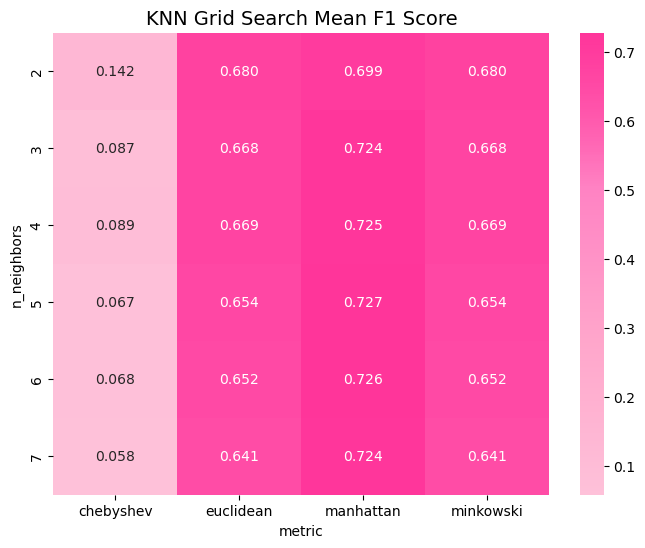

In [28]:
# Visualize grid search results for KNN
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Extract results from grid search
results = grid_knn.cv_results_
scores = results['mean_test_score']
params = results['params']

# Prepare DataFrame for heatmap
df = pd.DataFrame(params)
df['score'] = scores

# Pivot table for heatmap
pivot = df.pivot(index='n_neighbors', columns='metric', values='score')

# Custom colormap: soft bubble pink → warm rosy pink → medium-hot pink
bubble_to_hot_pink = LinearSegmentedColormap.from_list(
    "bubble_to_hot_pink",
    ["#fec1d9", "#ffa6cb", "#ff82c3", "#ff0080ca"],  # bubble pink → medium pink → rosy → hot pink
    N=256  # smooth gradient
)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(pivot, annot=True, fmt=".3f", cmap=bubble_to_hot_pink)
plt.title("KNN Grid Search Mean F1 Score", fontsize=14)
plt.ylabel("n_neighbors")
plt.xlabel("metric")
plt.show()



## Missclassified images for KNN

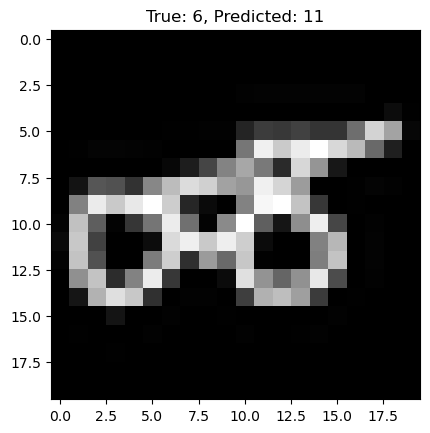

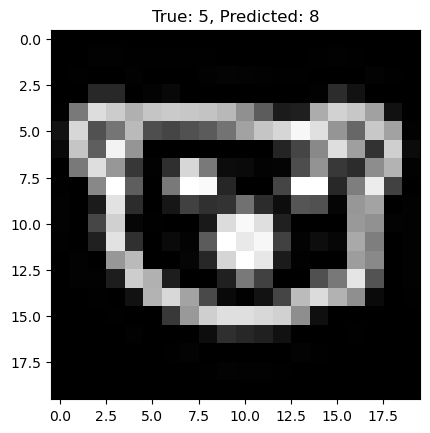

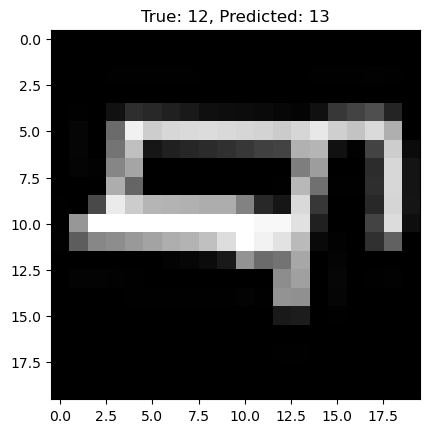

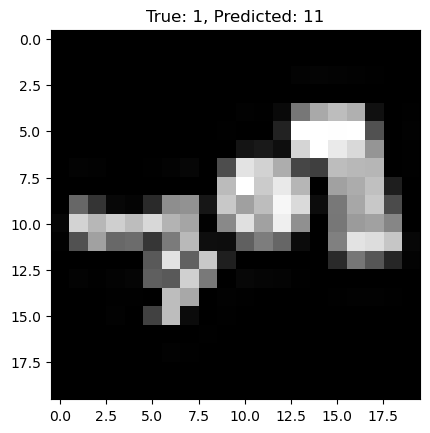

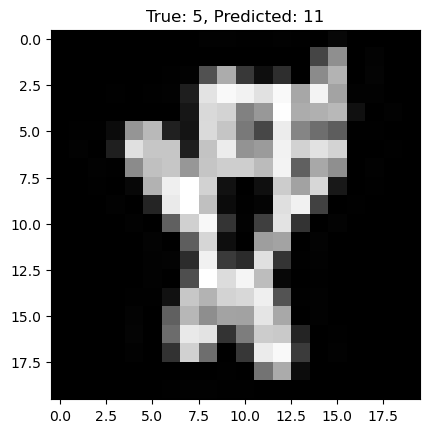

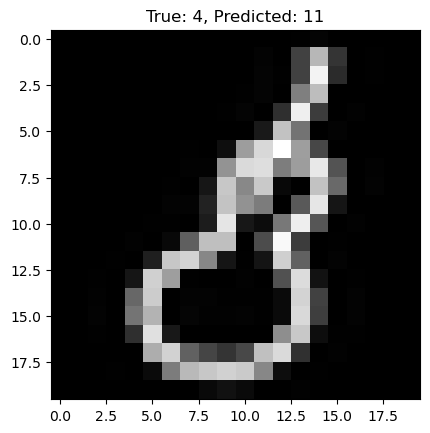

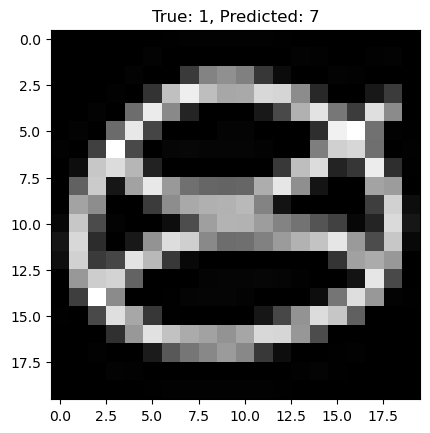

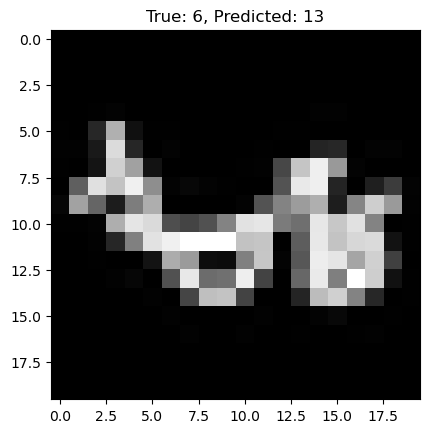

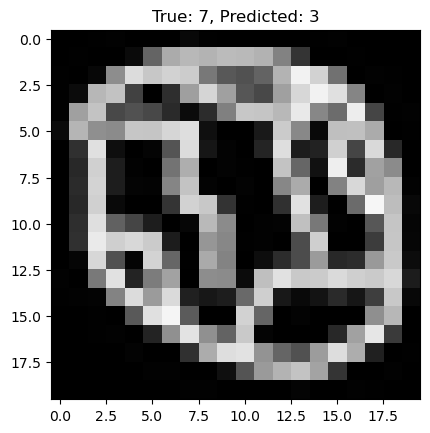

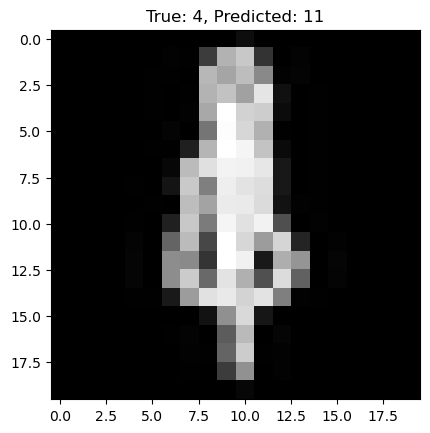

In [9]:

import matplotlib.pyplot as plt

# Find misclassified indices
misclassified = np.where(y_pred != y_test)[0]

# Show up to 10 misclassified images
for idx in misclassified[:10]:
    img = x_test[idx].reshape(20, 20) * 255  # Rescale if needed
    plt.imshow(img, vmin=0, vmax=255, cmap="gray")
    plt.title(f"True: {y_test[idx]}, Predicted: {y_pred[idx]}")
    plt.show()

# Corrupted Dataset

In [ ]:
dataset = np.load("dataset_corrupted.npz")
X, y = dataset["X"], dataset["y"]

In [ ]:
#MLP

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random_state)

mlp = MLPClassifier(max_iter=1000, solver='adam', random_state=random_state, early_stopping=True)

paramgrid_mlp = {
    'max_iter': [500, 1000, 2000, 3000],
    'hidden_layer_sizes': [(100,50), (200,100,50), (300,200,100), (400,300,200,100)],
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0001, 0.001, 0.01],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.05]
}

grid_mlp = GridSearchCV(mlp, paramgrid_mlp, cv=5, n_jobs=-1)
grid_mlp.fit(X_train, y_train)



y_pred_mlp = grid_mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print("Best parameters for MLP:", grid_mlp.best_params_)
print("Best MLP Accuracy:", accuracy_mlp)

#print training accuracy
y_train_pred_mlp = grid_mlp.predict(X_train)
accuracy_train_mlp = accuracy_score(y_train, y_train_pred_mlp)
print("Training Accuracy:", accuracy_train_mlp)

#print test accuracy
print("Test Accuracy:", accuracy_mlp)

plt.plot(grid_mlp.best_estimator_.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("MLP Training Loss Curve")
plt.show()